### The presentation:
https://docs.google.com/presentation/d/1ScuWx2j3J9nhekOpusS24Tnf6mHtOUb9XFd62Yho-ac/edit#slide=id.p

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

## I. Data extraction

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [49]:
df2 = pd.read_excel(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\FoodHub-20231204T083224Z-001\FoodHub\foodhub_order_v2.xlsx")
df2.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.2,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               1898 non-null   int64 
 1   customer_id            1898 non-null   int64 
 2   restaurant_name        1898 non-null   object
 3   cuisine_type           1898 non-null   object
 4   cost_of_the_order      1898 non-null   object
 5   day_of_the_week        1898 non-null   object
 6   rating                 1898 non-null   object
 7   food_preparation_time  1898 non-null   int64 
 8   delivery_time          1898 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 133.6+ KB


In [51]:
df2.describe()

,order_id,customer_id,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,27.371970,24.161749
std,5.480497e+02,113698.139743,4.632481,4.972637
min,1.476547e+06,1311.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,23.000000,20.000000
50%,1.477496e+06,128600.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.000000,33.000000


In [52]:
df2.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

## II. Exploratory data analysis

#### Delivery

In [53]:
df2['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [54]:
df2['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

##### Outliers for food prep & delivery time

<AxesSubplot: >

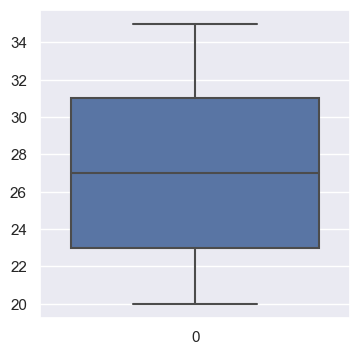

In [55]:
sns.set(rc={"figure.figsize":(4, 4)}) 
sns.boxplot(data=df2['food_preparation_time'])

<AxesSubplot: >

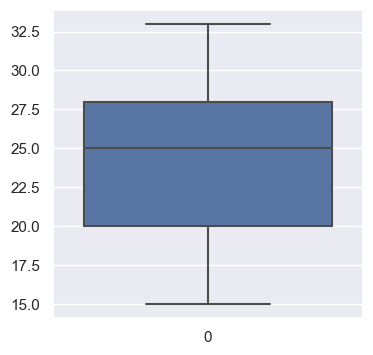

In [56]:
sns.boxplot(data=df2['delivery_time'])

##### Weekday & weekend ratio

In [57]:
df2['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

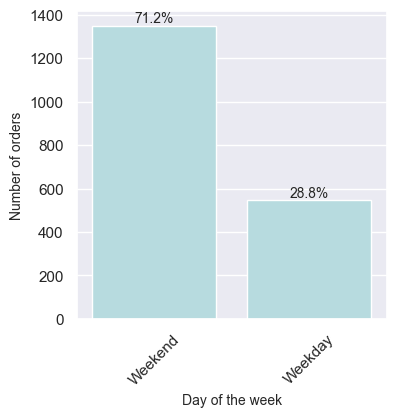

In [58]:
ax = sns.countplot(data = df2, x='day_of_the_week', color='powderblue')

total = df2['day_of_the_week'].count()

ax.bar_label(ax.containers[0], labels=[f'{(x/total)*100:0.1f}%' for x in df2['day_of_the_week'].value_counts()], fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set_xlabel('Day of the week', fontdict={'size':10})
ax.set_ylabel('Number of orders', fontdict={'size': 10})

plt.show()

##### Feature egnineering

In [59]:
df2['total_delivery_time'] = df2['food_preparation_time'] + df2['delivery_time']

In [60]:
df2.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'total_delivery_time'],
      dtype='object')

In [61]:
new_cols = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'day_of_the_week', 'rating', 'cost_of_the_order',
       'food_preparation_time', 'delivery_time','total_delivery_time']


In [62]:
df2 = df2[new_cols]

In [63]:
def total_delivery(time):
    if time > 60:
        return '60 - '
    elif time > 30 and time < 60:
        return '30 - 60'
    else:
        return '0 - 30'

In [64]:
df3 = df2.copy()

In [65]:
df3['delivery_data'] = df3['total_delivery_time'].apply(total_delivery)

In [66]:
counts = df3['delivery_data'].value_counts()

In [67]:
categories = ['0 - 30', '30 - 60', '60 - ']
counts = counts.reindex(categories)

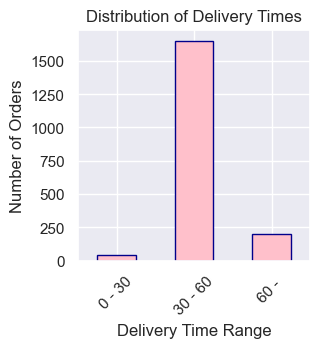

In [68]:
plt.figure(figsize=(3,3))
counts.plot(kind='bar', color='pink', edgecolor='darkblue', width=0.5)
plt.xlabel('Delivery Time Range')
plt.ylabel('Number of Orders')
plt.title('Distribution of Delivery Times')
plt.xticks(rotation=45)
plt.show()

#### Cuisine

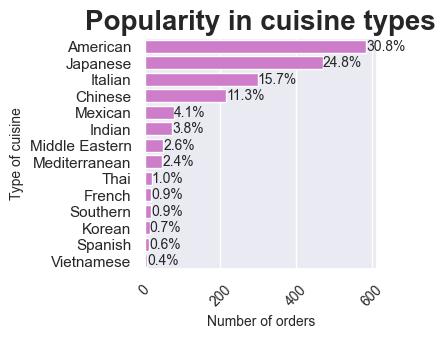

In [69]:
sns.set(rc={"figure.figsize":(3, 3)}) 

ax = sns.countplot(data=df3, y='cuisine_type', color='orchid', order=df3['cuisine_type'].value_counts(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10);


ax.set_title('Popularity in cuisine types', fontdict={'size': 20, 'weight': 'bold'})

ax.set_xlabel('Number of orders', fontdict={'size': 10})
ax.set_ylabel('Type of cuisine', fontdict={'size': 10})

total = df2['cuisine_type'].count()

ax.bar_label(ax.containers[0], labels=[f'{(x/total)*100:0.1f}%' for x in df2['cuisine_type'].value_counts()], fontsize=10)

plt.show()

In [70]:
df3['cost_of_the_order'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: cost_of_the_order
Non-Null Count  Dtype 
--------------  ----- 
1898 non-null   object
dtypes: object(1)
memory usage: 15.0+ KB


In [71]:
df3['cost_of_the_order'] = pd.to_numeric(df3['cost_of_the_order'], errors='coerce')

In [72]:
df3.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=True)

cuisine_type
Vietnamese        12.882857
Korean            14.001538
Mediterranean     15.474783
Japanese          16.304755
Chinese           16.305209
American          16.319829
Italian           16.426768
Indian            16.919726
Mexican           17.038553
Middle Eastern    18.820612
Spanish           18.994167
Thai              19.207895
Southern          19.300588
French            19.793889
Name: cost_of_the_order, dtype: float64

In [73]:
avg_order = df3.groupby('cuisine_type')['cost_of_the_order'].mean()\
.reset_index()\
.rename(columns = {'cost_of_the_order':'Average_cost_of_oder'})\
.sort_values(by ='Average_cost_of_oder',ascending=False)\
.reset_index(drop=True)

In [74]:
avg_order

,cuisine_type,Average_cost_of_oder
0,French,19.793889
1,Southern,19.300588
2,Thai,19.207895
3,Spanish,18.994167
4,Middle Eastern,18.820612
5,Mexican,17.038553
6,Indian,16.919726
7,Italian,16.426768
8,American,16.319829
9,Chinese,16.305209


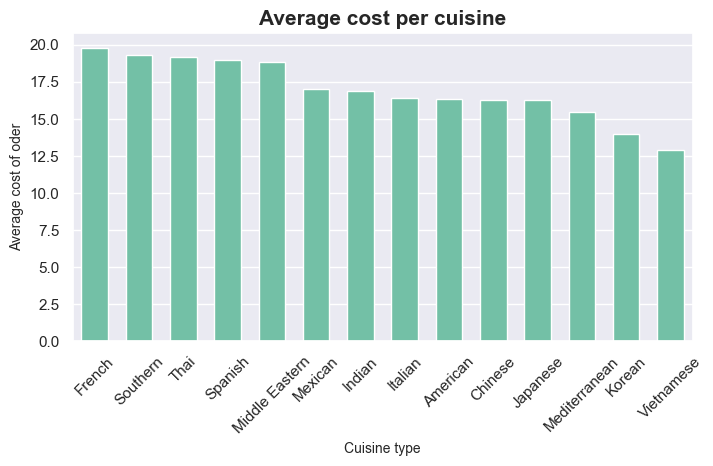

In [75]:
sns.set(rc={"figure.figsize":(8,4)})
ax= sns.barplot(data=avg_order, y='Average_cost_of_oder',
                x='cuisine_type',
                color='mediumaquamarine',width=0.6)


ax.set_title('Average cost per cuisine', fontdict={'size': 15, 'weight': 'bold'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set_xlabel('Cuisine type', fontdict={'size':10})
ax.set_ylabel('Average cost of oder', fontdict={'size': 10})

plt.show()

#### Orders

In [76]:
df3.groupby('day_of_the_week')['total_delivery_time'].mean()

day_of_the_week
Weekday    55.552102
Weekend    49.906736
Name: total_delivery_time, dtype: float64

In [77]:
df3.groupby('customer_id')['order_id'].count().sort_values()

customer_id
1311       1
175327     1
176234     1
178172     1
178846     1
          ..
65009      7
250494     8
83287      9
47440     10
52832     13
Name: order_id, Length: 1200, dtype: int64

In [78]:
df3['customer_orders_freq'] = df3['customer_id'].map(df3['customer_id'].value_counts())

In [79]:
def order_freq(freq):
    if freq > 3:
        return 'Above 3 orders placed'
    elif freq < 3 and freq > 1:
        return 'Between 1 & 3 orders placed'
    else:
        return 'One-time customer'

In [80]:
df3['customer_orders_freq_categories'] = df3['customer_orders_freq'].apply(order_freq)

In [81]:
df3.head()

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week,rating,cost_of_the_order,food_preparation_time,delivery_time,total_delivery_time,delivery_data,customer_orders_freq,customer_orders_freq_categories
0,1477147,337525,Hangawi,Korean,Weekend,Not given,30.75,25,20,45,30 - 60,2,Between 1 & 3 orders placed
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,Weekend,Not given,12.08,25,23,48,30 - 60,1,One-time customer
2,1477070,66393,Cafe Habana,Mexican,Weekday,5,12.23,23,28,51,30 - 60,1,One-time customer
3,1477334,106968,Blue Ribbon Fried Chicken,American,Weekend,3,29.20,25,15,40,30 - 60,2,Between 1 & 3 orders placed
4,1478249,76942,Dirty Bird to Go,American,Weekday,4,11.59,25,24,49,30 - 60,3,One-time customer


In [82]:
categories_freq = ['One-time customer', 'Between 1 & 3 orders placed', 'Above 3 orders placed']

In [83]:
values_freq = [784, 346, 66]

In [84]:
colors = ['moccasin','lightpink','lightslategrey','chocolate']

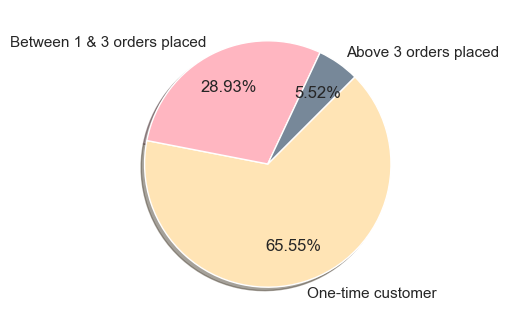

In [85]:
plt.pie(values_freq,labels=categories_freq, colors=colors, autopct='%.2f%%', pctdistance=0.7, startangle=45, shadow=True, counterclock=False)
plt.show()

#### Ratings

In [86]:
df3['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [87]:
df3['rating'].replace('Not given', 0, inplace=True)

In [88]:
df3['rating'] = df3['rating'].astype({'rating':'int'})

In [89]:
df3['rating'].value_counts()

0    736
5    588
4    386
3    188
Name: rating, dtype: int64

In [90]:
rating_rest = df3[df3['rating'] != 0]

In [91]:
rating_rest.head()

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week,rating,cost_of_the_order,food_preparation_time,delivery_time,total_delivery_time,delivery_data,customer_orders_freq,customer_orders_freq_categories
2,1477070,66393,Cafe Habana,Mexican,Weekday,5,12.23,23,28,51,30 - 60,1,One-time customer
3,1477334,106968,Blue Ribbon Fried Chicken,American,Weekend,3,29.20,25,15,40,30 - 60,2,Between 1 & 3 orders placed
4,1478249,76942,Dirty Bird to Go,American,Weekday,4,11.59,25,24,49,30 - 60,3,One-time customer
5,1477224,147468,Tamarind TriBeCa,Indian,Weekday,3,25.22,20,24,44,30 - 60,3,One-time customer
7,1477859,89574,Barbounia,Mediterranean,Weekday,3,5.97,33,30,63,60 -,1,One-time customer


In [92]:
rating_rest.groupby('rating')['rating'].count()

rating
3    188
4    386
5    588
Name: rating, dtype: int64

***Top 5 restaurants based on order frequency***

In [93]:
df3['restaurant_name'].value_counts().sort_values(ascending=False).head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [94]:
rating_rest.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)[rating_rest.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False) > 4].count()

110

*Restaurants received ratings*

In [95]:
rating_rest['restaurant_name'].nunique()

156

In [96]:
rating_rest.groupby('restaurant_name')['rating'].mean().sort_values(ascending=True).head(5)

restaurant_name
Sushi Choshi       3.0
Sarabeth's West    3.0
Pepe Giallo        3.0
brgr               3.0
Nha Trang One      3.0
Name: rating, dtype: float64

In [97]:
top5restaurants = ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']

In [98]:
above_4_rating = rating_rest[rating_rest['restaurant_name'].isin(top5restaurants)]

In [99]:
above_4_rating.groupby('restaurant_name')[['rating']].mean()\
.reset_index()\
.sort_values(by='rating', ascending=False)
#saving in another variable --> to use for pie chart

,restaurant_name,rating
4,The Meatball Shop,4.511905
0,Blue Ribbon Fried Chicken,4.328125
3,Shake Shack,4.278195
1,Blue Ribbon Sushi,4.219178
2,Parm,4.128205


In [100]:
categories_res = ['No rating', 'Between 3 & 4', "Between 4 & 5", 'Exactly 5']

In [101]:
values_res = [22, 17, 92, 47]

In [102]:
colors = ['azure', 'cadetblue', 'lightgreen', 'burlywood']

Text(0.5, 1.0, 'Overall ratings per restaurants')

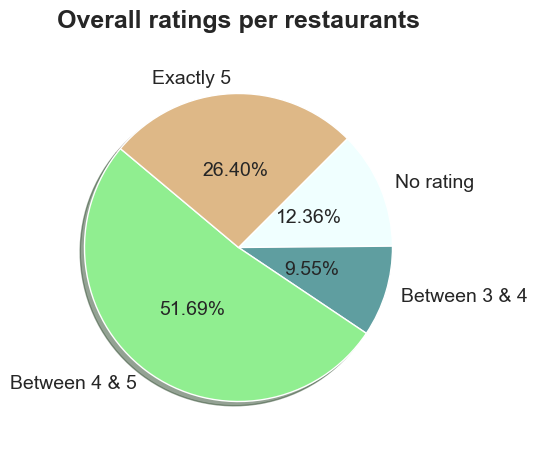

In [103]:
plt.figure(figsize=(5,5))
plt.pie(values_res,labels=categories_res, colors=colors, autopct='%.2f%%', pctdistance=0.5, startangle=45, shadow=True, counterclock=False, textprops={'fontsize':14})
plt.title(
    label="Overall ratings per restaurants", 
    fontdict={"fontsize":18, 'weight': 'bold'},
    pad=20)


#### Cost


In [104]:
df3['cost_of_the_order']

0       30.75
1       12.08
2       12.23
3       29.20
4       11.59
        ...  
1893    22.31
1894    12.18
1895    25.22
1896    12.18
1897    19.45
Name: cost_of_the_order, Length: 1898, dtype: float64

*Comment:Object dtype, so first converting to numeric*

In [105]:
numeric_vals = pd.to_numeric(df3['cost_of_the_order'],errors = 'coerce')

In [106]:
numeric_vals.isnull().sum()

3

In [107]:
idx = numeric_vals.isna()

In [108]:
idx

0       False
1       False
2       False
3       False
4       False
        ...  
1893    False
1894    False
1895    False
1896    False
1897    False
Name: cost_of_the_order, Length: 1898, dtype: bool

##### Identification of the stray characters

In [109]:
df3['cost_of_the_order'][idx].unique()

array([nan])

In [110]:
df3['cost_of_the_order'] = df3['cost_of_the_order'].replace('$',np.nan)\
                            .replace('.', np.nan)\
                            .replace('1 4.02','14.02')\
                            .astype(float)


In [111]:
df3.dtypes

order_id                             int64
customer_id                          int64
restaurant_name                     object
cuisine_type                        object
day_of_the_week                     object
rating                               int32
cost_of_the_order                  float64
food_preparation_time                int64
delivery_time                        int64
total_delivery_time                  int64
delivery_data                       object
customer_orders_freq                 int64
customer_orders_freq_categories     object
dtype: object

In [112]:
df3['cost_of_the_order'].mean()

16.50431662269129

In [113]:
df3['cost_of_the_order'].median()

14.16

<AxesSubplot: xlabel='cost_of_the_order', ylabel='Count'>

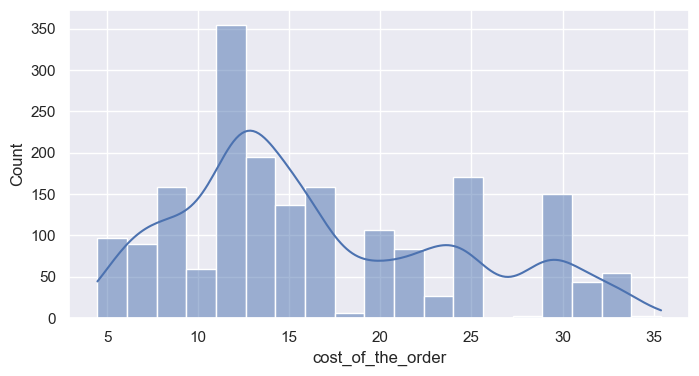

In [114]:
sns.histplot(df3['cost_of_the_order'], kde=True)

##### Handling the nullvalues and filling them with the mean

In [115]:
df3['cost_of_the_order'].fillna(df3['cost_of_the_order'].median(), inplace =True)

In [116]:
df3['cost_of_the_order'].isnull().sum()

0

In [117]:
df3['cost_of_the_order'].dtype

dtype('float64')

using the resting rest - already filtered on the rated orders

Text(0, 0.5, 'Frequency of the orders')

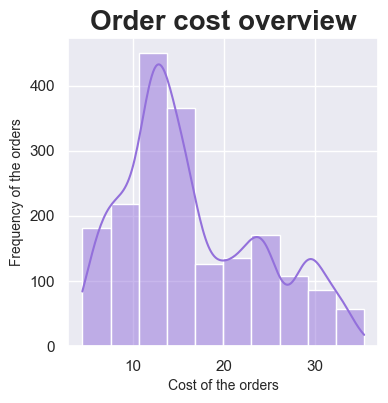

In [118]:
sns.set(rc={"figure.figsize":(4, 4)}) 
cost_ax = sns.histplot(data=df3['cost_of_the_order'], color='mediumpurple', kde=True, bins=10)
cost_ax.set_title('Order cost overview', fontdict={'size': 20, 'weight': 'bold'})
cost_ax.set_xlabel('Cost of the orders', fontdict={'size': 10})
cost_ax.set_ylabel('Frequency of the orders', fontdict={'size': 10})

In [119]:
def order_price_categories(category):
    if category > 25:
        return 'Above 25$'
    elif category > 10 and category < 25:
        return 'Between 10$ & 25$'
    else:
        return 'Below 10$'
    
    
df3['Order price'] = df3['cost_of_the_order'].apply(order_price_categories)

In [120]:
df3.head()

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week,rating,cost_of_the_order,food_preparation_time,delivery_time,total_delivery_time,delivery_data,customer_orders_freq,customer_orders_freq_categories,Order price
0,1477147,337525,Hangawi,Korean,Weekend,0,30.75,25,20,45,30 - 60,2,Between 1 & 3 orders placed,Above 25$
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,Weekend,0,12.08,25,23,48,30 - 60,1,One-time customer,Between 10$ & 25$
2,1477070,66393,Cafe Habana,Mexican,Weekday,5,12.23,23,28,51,30 - 60,1,One-time customer,Between 10$ & 25$
3,1477334,106968,Blue Ribbon Fried Chicken,American,Weekend,3,29.20,25,15,40,30 - 60,2,Between 1 & 3 orders placed,Above 25$
4,1478249,76942,Dirty Bird to Go,American,Weekday,4,11.59,25,24,49,30 - 60,3,One-time customer,Between 10$ & 25$


In [121]:
df3['Order price'].value_counts()

Between 10$ & 25$    1200
Below 10$             393
Above 25$             305
Name: Order price, dtype: int64

In [122]:
df3.head()

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week,rating,cost_of_the_order,food_preparation_time,delivery_time,total_delivery_time,delivery_data,customer_orders_freq,customer_orders_freq_categories,Order price
0,1477147,337525,Hangawi,Korean,Weekend,0,30.75,25,20,45,30 - 60,2,Between 1 & 3 orders placed,Above 25$
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,Weekend,0,12.08,25,23,48,30 - 60,1,One-time customer,Between 10$ & 25$
2,1477070,66393,Cafe Habana,Mexican,Weekday,5,12.23,23,28,51,30 - 60,1,One-time customer,Between 10$ & 25$
3,1477334,106968,Blue Ribbon Fried Chicken,American,Weekend,3,29.20,25,15,40,30 - 60,2,Between 1 & 3 orders placed,Above 25$
4,1478249,76942,Dirty Bird to Go,American,Weekday,4,11.59,25,24,49,30 - 60,3,One-time customer,Between 10$ & 25$


In [123]:
df3['cost_of_the_order'].describe()

count    1898.000000
mean       16.500611
std         7.482147
min         4.470000
25%        12.080000
50%        14.160000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

<AxesSubplot: >

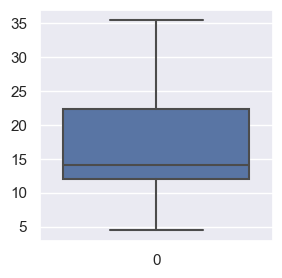

In [124]:
sns.set(rc={"figure.figsize":(3, 3)}) 
sns.boxplot(data=df3['cost_of_the_order'])

In [125]:
categories = ['Below 10$', 'Between 10$ & 25$', 'Above 25$']

In [126]:
values = [456, 1190, 252]

In [127]:
explodes = [0, 0, 0.3]

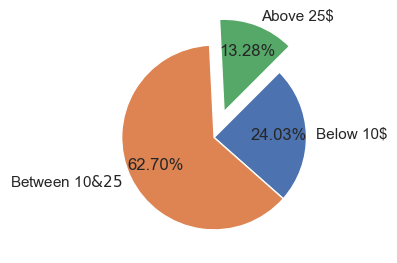

In [128]:
plt.pie(values,labels=categories, explode=explodes, autopct='%.2f%%', pctdistance=0.7, startangle=45, counterclock=False) 
plt.show()

## III. Conclusion & recommendation

**Delivery**: 
improvement of the 10% which is over 60 minutes →e.g.: reward competition between the delivery employees.
        
**Cuisine popularity**:
either contract the popular cuisines: american, japanese, italian, chinese, or promote the mexican, indian,middle eastern, mediterranean (1+1, or happy hour or ‘Asian days’) or contract new ones or re-categorize.
              
**Orders** : customer engagement increase targeting the between 1 and 3 orders place segmentation; e.g: in case order 3 times within 3 month, 20%discount.
        
**Cost**: motivate the restaurants for promotion package  above 20$ order cost.
         
**Ratings**: analyze the reason for 10% which are between 3 and 4.